# Computing statistics of Voronoi cells for simulations and resampled realizations in 2D projection

In [37]:
library(deldir)

In [38]:
computeVoronoiStats <- function(filename)
{
    simulation <- read.table(filename)
    x <- simulation[,2]
    y <- simulation[,3]
    voronoiObject <- deldir(x, y)
    P <- tilePerim(tile.list(voronoiObject))$perimeters
    A <- tileInfo(voronoiObject, bndry=TRUE)$Areas
    isoPerimetricRatio <- 4*pi*A/(P*P)
    return(isoPerimetricRatio)
}

In [39]:
OriginalIsoPerimetricRatio <- computeVoronoiStats("Sink/sink_m1.e4.dat")
RealizationIsoPerimetricRatio <- computeVoronoiStats("Seed/new_stars_seed_19.dat")

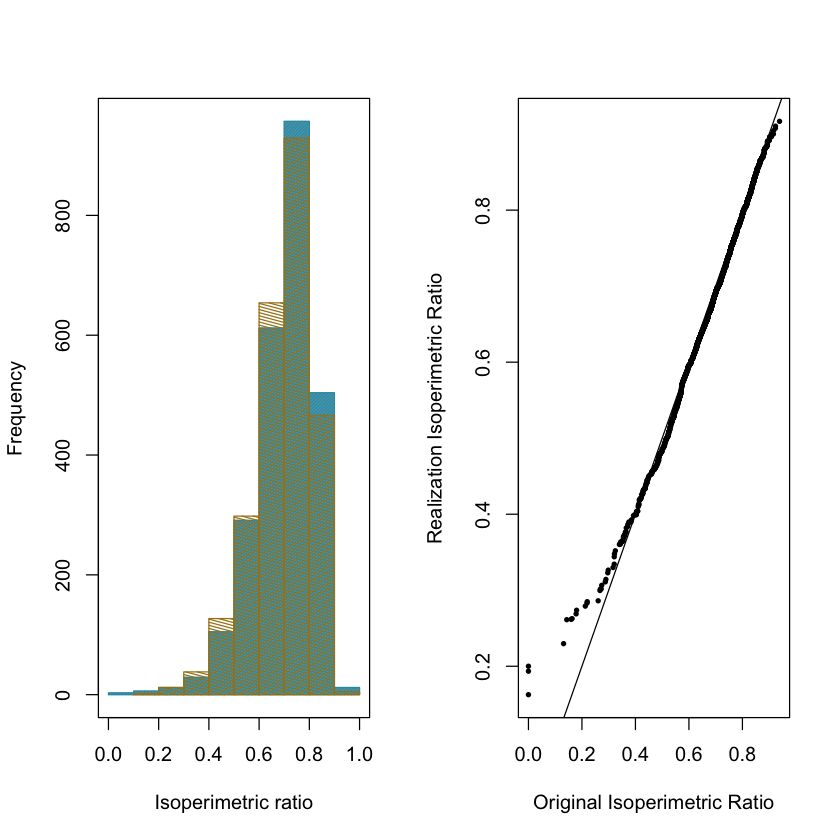

In [40]:
breaks <- 10
par(mfrow=c(1,2))
hist(OriginalIsoPerimetricRatio, main = "", xlab = "Isoperimetric ratio", col = "#3899B1", density = 120, angle = 45, border = "#3899B1", breaks = breaks)
box()
hist(RealizationIsoPerimetricRatio, add = TRUE, col = "#A88119", border = "#A88119", density = 40, angle = -15, breaks = breaks)
qqplot(OriginalIsoPerimetricRatio, RealizationIsoPerimetricRatio, ylab = "Realization Isoperimetric Ratio", xlab = "Original Isoperimetric Ratio", pch = 16, cex = 0.6)
abline(0,1)